# Step 1: Recipe to Vector

* I first use TfidfVectorize to transforms recipe to feature vectors that can be used as input to estimator. (based on term frequency)

* Here I consider recipe as documents and construct recipe vectors for every recipe. (ingredients as one vector, cooking directions as another)

* But sometimes, most of these features are correlated, and hence redundant. This is where dimensionality reduction algorithms come into play.(we used PCA here) Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA


df = pd.read_csv('core-data_recipe.csv', encoding='utf-8')
print(df.head())

print(df.info())

print(df.nunique())

print(eval(df['cooking_directions'][0])['directions'])
print(df['ingredients'][0])
df.drop(['recipe_name', 'image_url', 'nutritions'], axis=1, inplace=True)
#TfidfVectorizer：Transforms text to feature vectors that can be used as input to estimator.

tfidf = TfidfVectorizer(stop_words='english', min_df=2, max_df=0.9, max_features=5000) #also removed english stopwaords here.
pca = PCA(n_components=200)  #use PCA(principle component analysis) to reduce dimension
df['ingredients_v'] = pca.fit_transform(tfidf.fit_transform(df['ingredients']).todense()).tolist()
df['directions'] = df['cooking_directions'].apply(lambda x: eval(x)['directions'])
pca = PCA(n_components=400)  #use PCA to reduce dimension
df['directions_v'] = pca.fit_transform(tfidf.fit_transform(df['directions']).todense()).tolist()


df[['recipe_id', 'ingredients_v', 'directions_v']].to_csv('recipe_vector.csv', encoding='utf-8', index=0)

   recipe_id                              recipe_name  \
0     240488        Pork Loin, Apples, and Sauerkraut   
1     218939         Foolproof Rosemary Chicken Wings   
2      87211                    Chicken Pesto Paninis   
3     245714                       Potato Bacon Pizza   
4     218545  Latin-Inspired Spicy Cream Chicken Stew   

                                           image_url  \
0  https://images.media-allrecipes.com/userphotos...   
1  https://images.media-allrecipes.com/userphotos...   
2  https://images.media-allrecipes.com/userphotos...   
3  https://images.media-allrecipes.com/userphotos...   
4  https://images.media-allrecipes.com/userphotos...   

                                         ingredients  \
0  sauerkraut drained^Granny Smith apples sliced^...   
1  chicken wings^sprigs rosemary^head garlic^oliv...   
2  focaccia bread quartered^prepared basil pesto^...   
3  red potatoes^strips bacon^Sauce:^heavy whippin...   
4  skinless boneless chicken breast halv

In [15]:
recipe_vector = pd.DataFrame(df[['recipe_id', 'ingredients_v', 'directions_v']])
recipe_vector

,recipe_id,ingredients_v,directions_v
0,240488,"[-0.05384215834782468, 0.03784780841268805, -0...","[0.09126984451563099, 0.010284394523151436, 0...."
1,218939,"[-0.14337710310220866, 0.03740386358216859, -0...","[0.044205217183460856, -0.06140649764495523, 0..."
2,87211,"[-0.17641909142728493, -0.075792216645357, 0.1...","[-0.015347425918492003, 0.10678511493847467, 0..."
3,245714,"[-0.02661463822250366, -0.09574714970411816, 0...","[-0.004174489346182334, -0.1771898444030926, -..."
4,218545,"[-0.2296237214900196, 0.029283554346020493, 0....","[-0.14949419486196425, 0.026510819394692645, 0..."
5,20453,"[-0.04725965233317839, -0.15748365284439028, 0...","[-0.07551658799329673, 0.03383795606611975, 0...."
6,244856,"[-0.20465964807704592, 0.287937694788469, 0.04...","[-0.05796127944489797, -0.015880679490956937, ..."
7,22402,"[-0.013285945263003465, 0.13215571234294546, -...","[-0.12522423603543392, 0.014624207576284626, -..."
8,258163,"[-0.09988493540096907, 0.10071143232823564, 0....","[0.009144686257203485, -0.038625636100411954, ..."
9,23658,"[0.09402713324805045, 0.12775059752915524, 0.0...","[0.1977157088828684, -0.03060687694707066, -0...."


## Word Cloud

* I created word cloud for ingredients and directions to get an overview of word count in each of them.

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def word_cloud(result):
    wc1 = WordCloud(
        collocations=False,
        font_path='simhei.ttf',  # font path
        background_color='white',  # background color
        width=1000,
        height=1000,
        max_font_size=50,  # font size
        min_font_size=1,
        mask=plt.imread('ciyunbeijing.jpg'),  # background picture
        max_words=300
    )
    wc1.generate(result)
    return wc1

In [3]:
l_ingredients = ' '.join(df['ingredients'].values.tolist())
l_directions = ' '.join(df['directions'].values.tolist())

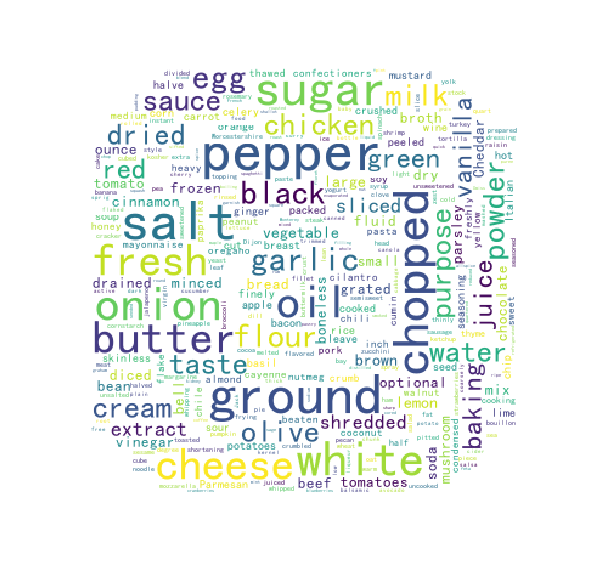

In [13]:
#Word Cloud on ingredients
wc_ingredients = word_cloud(l_ingredients)
plt.figure('1',figsize=(10,10)) 
plt.imshow(wc_ingredients)
plt.axis('off')  
plt.show()


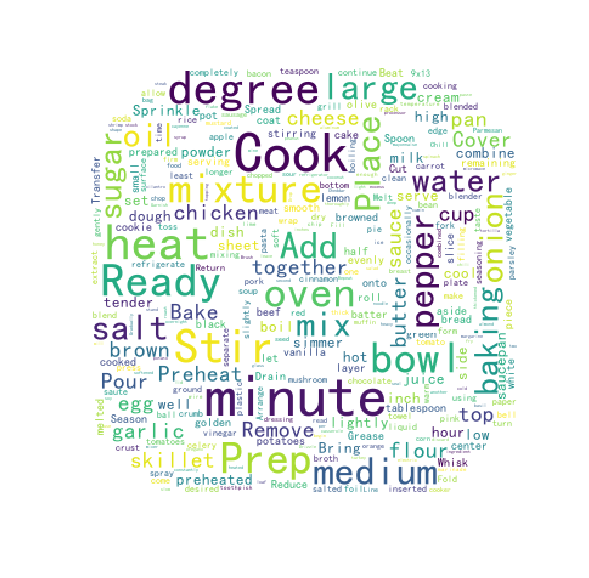

In [ ]:
#Word Cloud on directions
wc_directions = word_cloud(l_directions)
plt.figure('2',figsize=(10,10)) 
plt.imshow(wc_directions)
plt.axis('off')  
plt.show()

# Step 2: Create representative Vector for Users based on ratings

For the user_id, I went back to the dataset, look at a particular user_id, see what recipes does he or she like, then given that, I can create representative vectors for the user_id, based on whether they rated the recipe.
(Initially, I was doing weight by the rating, but did not go well)
I then construct representative vectors for each user_id.

In [6]:
import pandas as pd
import numpy as np

df_train = pd.read_csv('core-data-train_rating.csv', encoding='utf-8')
df_recipe_v = pd.read_csv('recipe_vector.csv', encoding='utf-8', index_col=0)
d_user = {}
for i in range(len(df_train)):
    user = df_train['user_id'][i]
    recipe = df_train['recipe_id'][i]
    rating = df_train['rating'][i]
    ingredients_v = np.array(eval(df_recipe_v.loc[recipe]['ingredients_v']))
    directions_v = np.array(eval(df_recipe_v.loc[recipe]['directions_v']))
    if user in d_user:
        d_user[user][0] += (rating - 3) * ingredients_v   # if they do rated the recipe, then (rating-3)*the vector
        d_user[user][1] += (rating - 3) * directions_v
    else:
        d_user[user] = [(rating - 3) * ingredients_v, (rating - 3) * directions_v] 
l_user = []
l_ingredients_v = []
l_directions_v = []
for user, vecs in d_user.items():
    l_user.append(user)
    l_ingredients_v.append(list(vecs[0]))
    l_directions_v.append(list(vecs[1]))
df_user_v = pd.DataFrame({'user_id': l_user, 'ingredients_v': l_ingredients_v, 'directions_v': l_directions_v})
df_user_v.to_csv('user_vector.csv', encoding='utf-8', index=0)

In [7]:
df_user_v

,directions_v,ingredients_v,user_id
0,"[1.15016565548, -0.0529376362715, -0.797376548...","[2.77770608209, 0.880556387369, 0.236490074736...",1245184
1,"[1.4818340689, -0.199490761318, -0.37821283894...","[2.63677737923, 0.0646754587226, 1.06172052265...",131074
2,"[-1.47724647908, -0.0258572587266, 0.524430559...","[-1.92244964954, 0.566230166363, 0.00171730108...",1703941
3,"[-0.429504425052, 0.234164348178, 0.6828254036...","[-1.09272879779, -0.547037289282, 0.2459166809...",3670017
4,"[0.496379528124, 0.0103831693758, -0.142487678...","[0.149926747768, -0.302243716923, -0.336072078...",4456457
5,"[-0.538360682453, -0.0287372187172, 0.35828445...","[-0.873687637247, -0.728024316805, 0.244446884...",5242893
6,"[2.43265396897, -0.905061167887, -0.5995058433...","[2.32135289814, 1.17176244422, 0.680374691012,...",16
7,"[-0.130636870953, 0.36248724991, 0.23892983361...","[-0.0914437166077, 0.108489813397, -0.45686094...",7208977
8,"[-0.580278956863, -0.20641293539, -0.195815334...","[-0.480405474947, 0.373279967002, 0.0494631420...",6225923
9,"[0.789978434158, -0.255050214203, -0.020497752...","[0.685930625499, -0.136052502945, -0.404735343...",3407895


# Step 3: calculate the mean rating of each user 

* Here I calculate the mean rating of each user, we think each user has his/her specific rating behavior, for example always gives high ratings.

* I also get a bar chart that shows the distribution of all the ratings in the interation file. I want to use that information as criterion as we define our rating function.

In [13]:
#calculate the mean rating of each user to analyze their rating behavior
import pandas as pd

df_train = pd.read_csv('core-data-train_rating.csv', encoding='utf-8')
df_train.groupby('user_id')['rating'].mean().to_csv('user_mean.csv', encoding='utf-8')  

In [16]:
user_mean = pd.DataFrame(df_train.groupby('user_id')['rating'].mean())
user_mean

,rating
user_id,
16,4.714286
32,4.739726
39,4.742358
268,4.400000
338,4.417671
521,4.421053
604,4.782609
651,4.666667
814,3.500000


* Before define the score function, we would like to see the distribution of the ratings in the interaction dataset

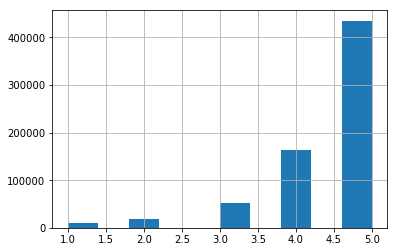

In [12]:
#see the distribution of the ratings in the interaction dataset
%matplotlib inline
df_train['rating'].hist() 

# Step 4: Define Score & Predict Rating

* I then defined a customized model to calculte similarity based on cosine distance.
* "How close is this person in space to a particular recipe?"

In [12]:
# define cosine similarity - customize model
import numpy as np
def sim(vector_a, vector_b):
    """
    calculate the cosine distance between two vectors
    :param vector_a: vector a
    :param vector_b: vector b
    :return: sim
    """
    vector_a = np.mat(vector_a)
    vector_b = np.mat(vector_b)
    num = float(vector_a * vector_b.T)
    denom = np.linalg.norm(vector_a) * np.linalg.norm(vector_b)
    if denom == 0:
        return 0
    cos = num / denom
    sim = cos
    return sim




In [13]:
import pandas as pd

#reading all the dataset
df_user_mean = pd.read_csv('user_mean.csv', encoding='utf-8', header=None, index_col=0)
print(df_user_mean.head())
df_valid = pd.read_csv('core-data-valid_rating.csv', encoding='utf-8')
df_recipe_v = pd.read_csv('recipe_vector.csv', encoding='utf-8', index_col=0)
df_user_v = pd.read_csv('user_vector.csv', encoding='utf-8', index_col=2)




            1
0            
16   4.714286
32   4.739726
39   4.742358
268  4.400000
338  4.417671


* I define the score function based on similarity, also incorporated with the distribution of the rating, since there are clearly much more 5-ratings

In [14]:
# define the score
def score(user, recipe, df_user_mean, df_recipe_v, df_user_v):
    score_mean = df_user_mean.loc[user].values[0]
    ingredients_v_recipe = np.array(eval(df_recipe_v.loc[recipe]['ingredients_v']))
    directions_v_recipe = np.array(eval(df_recipe_v.loc[recipe]['directions_v']))
    ingredients_v_user = np.array(eval(df_user_v.loc[user]['ingredients_v']))
    directions_v_user = np.array(eval(df_user_v.loc[user]['directions_v']))
    sim1 = sim(ingredients_v_user, ingredients_v_recipe) #similarity b/t user ingredients, and recipe ingredients
    sim2 = sim(directions_v_user, directions_v_recipe) #similarity b/t user directions, and recipe directions
    sim_all = 0.2 * sim1 + 0.8 * sim2  #tryout different weights
    if sim_all < -0.8:         #similarity < -0.8, rating =3
        score = 3
    elif sim_all < -0.5:
        score = 4
    else:
        score = 5
    return score

In [15]:
# predict the score 
from sklearn import metrics

y_test = df_valid['rating']
y_mean = df_valid.apply(lambda x: df_user_mean.loc[x['user_id']].values[0], axis=1)
print(metrics.mean_absolute_error(y_test, y_mean))
df_valid['rating_pred'] = df_valid.apply(lambda x: score(x['user_id'], x['recipe_id'], 
                                                         df_user_mean, df_recipe_v, df_user_v), axis=1)
y_pred = df_valid['rating_pred']

print(y_pred[:5])
y_mean = df_valid.apply(lambda x: df_user_mean.loc[x['user_id']].values[0], axis=1)
print(metrics.mean_absolute_error(y_test, y_pred))

0.5835731891830089
0    5
1    5
2    5
3    5
4    5
Name: rating_pred, dtype: int64
0.49406184670947634


# Lowest MAE= 0.49406184670947634

In [11]:
#define function to choose parameter
def score_new(user, recipe, df_user_mean, df_recipe_v, df_user_v, a):
    score_mean = df_user_mean.loc[user].values[0]
    ingredients_v_recipe = np.array(eval(df_recipe_v.loc[recipe]['ingredients_v']))
    directions_v_recipe = np.array(eval(df_recipe_v.loc[recipe]['directions_v']))
    ingredients_v_user = np.array(eval(df_user_v.loc[user]['ingredients_v']))
    directions_v_user = np.array(eval(df_user_v.loc[user]['directions_v']))
    sim1 = sim(ingredients_v_user, ingredients_v_recipe)
    sim2 = sim(directions_v_user, directions_v_recipe)
    sim_all = a * sim1 + (1 - a) * sim2
    return round(sim_all * 2 + score_mean)

In [13]:
#use the above function to calculate a=0.1 to 0.8
for a in np.arange(0.1, 0.9, 0.1):
    y_pred = df_valid.apply(lambda x: score_new(x['user_id'], x['recipe_id'], df_user_mean, 
                                                             df_recipe_v, df_user_v, a), axis=1)
    y_mean = df_valid.apply(lambda x: df_user_mean.loc[x['user_id']].values[0], axis=1)
    print(a, metrics.mean_absolute_error(y_test, y_pred))

0.1 0.5607864587626162
0.2 0.5602319813575705
0.30000000000000004 0.5607639799488982
0.4 0.5622251028405728
0.5 0.5644654912744738
0.6 0.5682419319791097
0.7000000000000001 0.5725803430266974
0.8 0.5772034857147139


In [ ]:
#predict and convert given data to csv
df_test = pd.read_csv('test_10k_1.csv', encoding='utf-8')
df_test['rating'] = df_test.apply(lambda x: score(x['user_id'], x['recipe_id'], 
                                                         df_user_mean, df_recipe_v, df_user_v), axis=1)
df_test['user_rep_id'] = df_test.apply(lambda x: str(x['user_id']) + str(x['recipe_id']), axis=1)
print(df_test.head())
df_test[['user_rep_id', 'rating']].to_csv('test_10k.csv',  encoding='utf-8', index=0)

   user_id  recipe_id  rating  user_rep_id
0     5568      21412       5        26980
1  3964202      75639       5      4039841
2  2621648      18015       5      2639663
3  3984678      12405       5      3997083
4  1055463      12051       5      1067514
